In [1]:
import pandas as pd
import numpy as np

#directory = '/content/drive/My Drive/progetto stat learning/tabelle'
directory = r'C:\Users\italo\OneDrive\Desktop'
file = 'yoo.csv'
df = pd.read_csv(f'{directory}/{file}')

print(df.shape)
df.head(5)

(216, 12)


,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,0,R,74,2,3,29,0,1344,0.743,"1,306",NaN
1,OAS1_0002_MR1,0,R,55,4,1,29,0,1147,0.810,"1,531",NaN
2,OAS1_0003_MR1,0,R,73,4,3,27,1,1454,0.708,"1,207",NaN
3,OAS1_0010_MR1,1,R,74,5,2,30,0,1636,0.689,"1,073",NaN
4,OAS1_0011_MR1,0,R,52,3,2,30,0,1321,0.827,"1,329",NaN


In [2]:
df = df.drop(columns = ['Hand', 'Delay', 'ID']) #we dropped these two variables becauese are useless
df.head()

,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,74,2,3,29,0,1344,0.743,"1,306"
1,0,55,4,1,29,0,1147,0.810,"1,531"
2,0,73,4,3,27,1,1454,0.708,"1,207"
3,1,74,5,2,30,0,1636,0.689,"1,073"
4,0,52,3,2,30,0,1321,0.827,"1,329"


In [3]:
df['ASF'] = df['ASF'].apply(lambda x: float(x.split()[0].replace(',', '.'))) #now we see ASF like float64 type

In [4]:
print(df.shape)
print(df.dtypes)

(216, 9)
M/F       int64
Age       int64
Educ      int64
SES       int64
MMSE      int64
CDR       int64
eTIV      int64
nWBV    float64
ASF     float64
dtype: object


### splitting target variable from df

In [5]:
#df['ASF'] = df['ASF'].apply(lambda x: float(x.split()[0].replace(',', ''))) #now we see ASF like float64 type

In [6]:
X = df.loc[:, df.columns != 'CDR']
y = df.loc[:, df.columns == 'CDR'] #this is target variable

In [7]:
y = y.squeeze() #to transform a column-vector in a 1d array

In [8]:
X_encoded = pd.get_dummies(X, columns = ['M/F', 'Educ', 'SES'])
X_encoded.head()

,Age,MMSE,eTIV,nWBV,ASF,M/F_0,M/F_1,Educ_1,Educ_2,Educ_3,Educ_4,Educ_5,SES_1,SES_2,SES_3,SES_4,SES_5
0,74,29,1344,0.743,1.306,1,0,0,1,0,0,0,0,0,1,0,0
1,55,29,1147,0.810,1.531,1,0,0,0,0,1,0,1,0,0,0,0
2,73,27,1454,0.708,1.207,1,0,0,0,0,1,0,0,0,1,0,0
3,74,30,1636,0.689,1.073,0,1,0,0,0,0,1,0,1,0,0,0
4,52,30,1321,0.827,1.329,1,0,0,0,1,0,0,0,1,0,0,0


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.30)

In [10]:
#to implement Radial Basis Function variables are supposed to be scaled and centered
from sklearn.preprocessing import scale

X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

# Simple SVM 


In [12]:
#https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/

In [12]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

svclassifier = SVC(kernel='linear', random_state = 0)
svclassifier.fit(X_train_scaled, y_train)
y_pred = svclassifier.predict(X_test_scaled)

#print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, zero_division = 0))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92        40
           1       0.41      0.50      0.45        14
           2       0.20      0.11      0.14         9
           3       0.00      0.00      0.00         2

    accuracy                           0.71        65
   macro avg       0.37      0.39      0.38        65
weighted avg       0.66      0.71      0.68        65



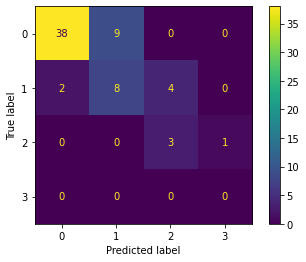

In [14]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(svclassifier, X_test_scaled, y_test, values_format = 'd') #, display_labels = ['0', '1', '2'])

# Kernel SVM

## Polynomial Kernel

In [15]:
svclassifier = SVC(kernel='poly', degree=8, random_state = 0)
svclassifier.fit(X_train_scaled, y_train)
y_pred = svclassifier.predict(X_test_scaled)

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division = 0))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85        47
           1       0.33      0.07      0.12        14
           2       0.50      0.50      0.50         4
           3       0.00      0.00      0.00         0

    accuracy                           0.72        65
   macro avg       0.40      0.38      0.37        65
weighted avg       0.66      0.72      0.67        65



ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of ticklabels (3).

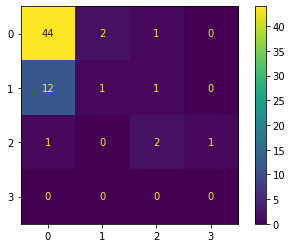

In [16]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(svclassifier, X_test_scaled, y_test, values_format = 'd', display_labels = ['0', '1', '2'])

## Gaussian Kernel

In [17]:
svclassifier = SVC(kernel='rbf', random_state = 0)
svclassifier.fit(X_train_scaled, y_train)
y_pred = svclassifier.predict(X_test_scaled)

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90        47
           1       0.43      0.43      0.43        14
           2       0.00      0.00      0.00         4

    accuracy                           0.75        65
   macro avg       0.44      0.45      0.44        65
weighted avg       0.73      0.75      0.74        65



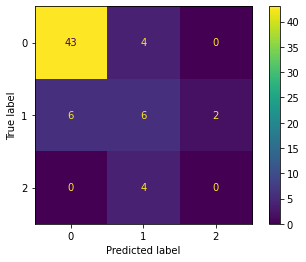

In [18]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(svclassifier, X_test_scaled, y_test, values_format = 'd', display_labels = ['0', '1', '2'])

## Sigmoid Kernel


In [19]:
svclassifier = SVC(kernel='sigmoid', random_state = 0)
svclassifier.fit(X_train_scaled, y_train)
y_pred = svclassifier.predict(X_test_scaled)
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94        47
           1       0.69      0.64      0.67        14
           2       1.00      0.25      0.40         4

    accuracy                           0.86        65
   macro avg       0.86      0.62      0.67        65
weighted avg       0.86      0.86      0.85        65



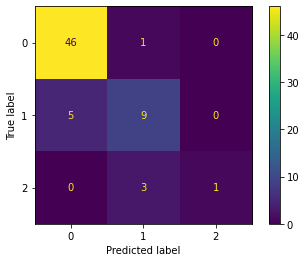

In [20]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(svclassifier, X_test_scaled, y_test, values_format = 'd', display_labels = ['0', '1', '2'])

## Cross Validation to optimize parameters

In [21]:
# https://www.youtube.com/watch?v=8A7L0GsBiLQ&ab_channel=StatQuestwithJoshStarmer

In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'C': [0.5, 1, 10, 100], 
    'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001], 
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid' ]},
]

optimal_parameters = GridSearchCV(SVC(), param_grid, cv = 5, scoring = 'accuracy', verbose = 0)

optimal_parameters.fit(X_train_scaled, y_train)
print(optimal_parameters.best_params_)

C:\Users\italo\miniconda3\envs\exams\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


{'C': 1, 'gamma': 0.1, 'kernel': 'sigmoid'}


# Simple SVM

In [23]:
svclassifier = SVC(kernel='linear', random_state = 0, C = 1, gamma = 0.1)
svclassifier.fit(X_train_scaled, y_train)
y_pred = svclassifier.predict(X_test_scaled)

#print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, zero_division = 0))

              precision    recall  f1-score   support

           0       0.95      0.81      0.87        47
           1       0.47      0.57      0.52        14
           2       0.43      0.75      0.55         4
           3       0.00      0.00      0.00         0

    accuracy                           0.75        65
   macro avg       0.46      0.53      0.48        65
weighted avg       0.81      0.75      0.78        65



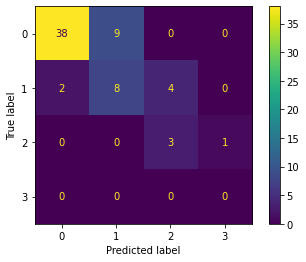

In [24]:
plot_confusion_matrix(svclassifier, X_test_scaled, y_test, values_format = 'd') #, display_labels = ['0', '1', '2', '3'])

# Kernel SVM


## Polynomial Kernel 

In [25]:
svclassifier = SVC(kernel='poly', degree=8, random_state = 0, C = 1, gamma = 0.1)
svclassifier.fit(X_train_scaled, y_train)
y_pred = svclassifier.predict(X_test_scaled)

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division = 0)) #zero_division problem

              precision    recall  f1-score   support

           0       0.84      0.87      0.85        47
           1       0.38      0.21      0.27        14
           2       0.29      0.50      0.36         4
           3       0.00      0.00      0.00         0

    accuracy                           0.71        65
   macro avg       0.37      0.40      0.37        65
weighted avg       0.70      0.71      0.70        65



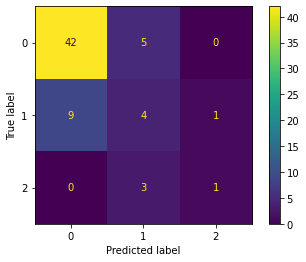

In [35]:
plot_confusion_matrix(svclassifier, X_test_scaled, y_test, values_format = 'd', display_labels = ['0', '1', '2'])

## Gaussian Kernel


In [27]:
svclassifier = SVC(kernel='rbf', random_state = 0, C = 1, gamma = 0.1)
svclassifier.fit(X_train_scaled, y_train)
y_pred = svclassifier.predict(X_test_scaled)

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86        47
           1       0.33      0.29      0.31        14
           2       0.50      0.25      0.33         4

    accuracy                           0.72        65
   macro avg       0.55      0.48      0.50        65
weighted avg       0.70      0.72      0.71        65



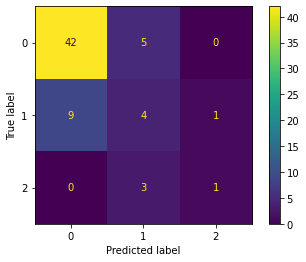

In [36]:
plot_confusion_matrix(svclassifier, X_test_scaled, y_test, values_format = 'd', display_labels = ['0', '1', '2'])

## Sigmoid Kernel

In [37]:
svclassifier = SVC(kernel='sigmoid', random_state = 0, C = 1, gamma = 0.1)
svclassifier.fit(X_train_scaled, y_train)
y_pred = svclassifier.predict(X_test_scaled)
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        47
           1       0.67      0.57      0.62        14
           2       1.00      0.75      0.86         4

    accuracy                           0.85        65
   macro avg       0.85      0.75      0.79        65
weighted avg       0.84      0.85      0.84        65



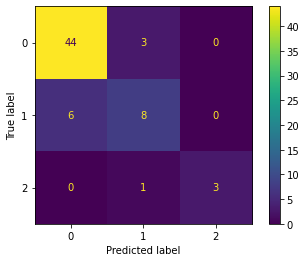

In [40]:
plot_confusion_matrix(svclassifier, X_test_scaled, y_test, values_format = 'd', display_labels = ['0', '1', '2'])

#### to try to improve results we merged labels 2 and 3

In [19]:
directory = r'C:\Users\italo\OneDrive\Desktop\alzheimer'
file = 'our_merged_dataset.csv'
df = pd.read_csv(f'{directory}/{file}')

print(df.shape)
df.head(5)

(216, 12)


,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,0,R,74,2,3,29,0,1344,0.743,"1,306",NaN
1,OAS1_0002_MR1,0,R,55,4,1,29,0,1147,0.810,"1,531",NaN
2,OAS1_0003_MR1,0,R,73,4,3,27,1,1454,0.708,"1,207",NaN
3,OAS1_0010_MR1,1,R,74,5,2,30,0,1636,0.689,"1,073",NaN
4,OAS1_0011_MR1,0,R,52,3,2,30,0,1321,0.827,"1,329",NaN


In [20]:
df = df.drop(columns = ['Hand', 'Delay', 'ID']) #we dropped these two variables becauese are useless
df.head()

,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,74,2,3,29,0,1344,0.743,"1,306"
1,0,55,4,1,29,0,1147,0.810,"1,531"
2,0,73,4,3,27,1,1454,0.708,"1,207"
3,1,74,5,2,30,0,1636,0.689,"1,073"
4,0,52,3,2,30,0,1321,0.827,"1,329"


In [21]:
df['ASF'] = df['ASF'].apply(lambda x: float(x.split()[0].replace(',', '.'))) #now we see ASF like float64 type

In [22]:
print(df.shape)
print(df.dtypes)

(216, 9)
M/F       int64
Age       int64
Educ      int64
SES       int64
MMSE      int64
CDR       int64
eTIV      int64
nWBV    float64
ASF     float64
dtype: object


### splitting target variable from df

In [23]:
#df['ASF'] = df['ASF'].apply(lambda x: float(x.split()[0].replace(',', ''))) #now we see ASF like float64 type

In [24]:
X = df.loc[:, df.columns != 'CDR']
y = df.loc[:, df.columns == 'CDR'] #this is target variable

In [25]:
y = y.squeeze() #to transform a column-vector in a 1d array

In [26]:
X_encoded = pd.get_dummies(X, columns = ['M/F', 'Educ', 'SES'])
X_encoded.head()

,Age,MMSE,eTIV,nWBV,ASF,M/F_0,M/F_1,Educ_1,Educ_2,Educ_3,Educ_4,Educ_5,SES_1,SES_2,SES_3,SES_4,SES_5
0,74,29,1344,0.743,1.306,1,0,0,1,0,0,0,0,0,1,0,0
1,55,29,1147,0.810,1.531,1,0,0,0,0,1,0,1,0,0,0,0
2,73,27,1454,0.708,1.207,1,0,0,0,0,1,0,0,0,1,0,0
3,74,30,1636,0.689,1.073,0,1,0,0,0,0,1,0,1,0,0,0
4,52,30,1321,0.827,1.329,1,0,0,0,1,0,0,0,1,0,0,0


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.30)

In [28]:
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

# Simple SVM 


In [51]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

svclassifier = SVC(kernel='linear', random_state = 0)
svclassifier.fit(X_train_scaled, y_train)
y_pred = svclassifier.predict(X_test_scaled)

#print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.97      0.87        37
           1       0.36      0.31      0.33        16
           4       0.80      0.33      0.47        12

    accuracy                           0.69        65
   macro avg       0.65      0.54      0.56        65
weighted avg       0.68      0.69      0.66        65



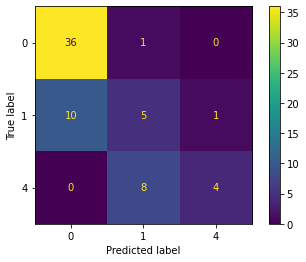

In [52]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(svclassifier, X_test_scaled, y_test, values_format = 'd', display_labels = ['0', '1', '4'])

# Kernel SVM


## Polynomial Kernel

In [53]:
svclassifier = SVC(kernel='poly', degree=8, random_state = 0)
svclassifier.fit(X_train_scaled, y_train)
y_pred = svclassifier.predict(X_test_scaled)

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division = 0))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75        37
           1       0.00      0.00      0.00        16
           4       0.50      0.08      0.14        12

    accuracy                           0.58        65
   macro avg       0.37      0.36      0.30        65
weighted avg       0.43      0.58      0.45        65



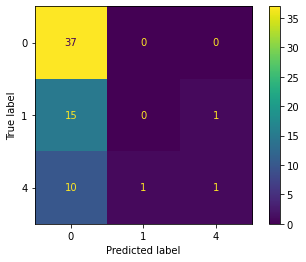

In [54]:
plot_confusion_matrix(svclassifier, X_test_scaled, y_test, values_format = 'd', display_labels = ['0', '1', '4'])

## Gaussian Kernel


In [16]:
svclassifier = SVC(kernel='rbf', random_state = 0)
svclassifier.fit(X_train_scaled, y_train)
y_pred = svclassifier.predict(X_test_scaled)

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88        40
           1       0.33      0.43      0.38        14
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         2

    accuracy                           0.68        65
   macro avg       0.29      0.34      0.31        65
weighted avg       0.58      0.68      0.62        65



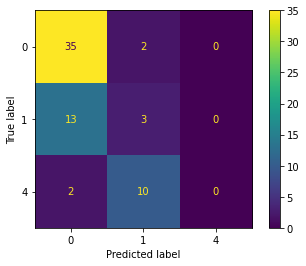

In [56]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(svclassifier, X_test_scaled, y_test, values_format = 'd', display_labels = ['0', '1', '4'])

## Sigmoid Kernel


In [29]:
svclassifier = SVC(kernel='sigmoid', random_state = 0)
svclassifier.fit(X_train_scaled, y_train)
y_pred = svclassifier.predict(X_test_scaled)
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85        43
           1       0.50      0.24      0.32        17
           4       0.50      0.60      0.55         5

    accuracy                           0.72        65
   macro avg       0.59      0.59      0.57        65
weighted avg       0.69      0.72      0.69        65



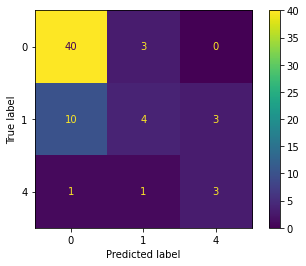

In [30]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(svclassifier, X_test_scaled, y_test, values_format = 'd', display_labels = ['0', '1', '4'])

## Cross Validation to optimize parameters


In [58]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'C': [0.5, 1, 10, 100], 
    'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001], 
    'kernel': ['rbf', 'poly', 'linear', 'sigmoid']},
]

optimal_parameters = GridSearchCV(SVC(), param_grid, cv = 5, scoring = 'accuracy', verbose = 0)

optimal_parameters.fit(X_train_scaled, y_train)
print(optimal_parameters.best_params_)

{'C': 0.5, 'gamma': 0.1, 'kernel': 'sigmoid'}


# Simple SVM

In [59]:
svclassifier = SVC(kernel='linear', random_state = 0, C = 0.5, gamma = 0.1)
svclassifier.fit(X_train_scaled, y_train)
y_pred = svclassifier.predict(X_test_scaled)

#print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, zero_division = 0))

              precision    recall  f1-score   support

           0       0.78      0.97      0.87        37
           1       0.36      0.31      0.33        16
           4       0.80      0.33      0.47        12

    accuracy                           0.69        65
   macro avg       0.65      0.54      0.56        65
weighted avg       0.68      0.69      0.66        65



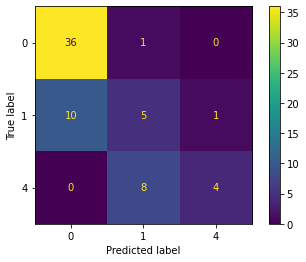

In [60]:
plot_confusion_matrix(svclassifier, X_test_scaled, y_test, values_format = 'd', display_labels = ['0', '1', '4'])

# Kernel SVM


## Polynomial Kernel

In [61]:
svclassifier = SVC(kernel='poly', degree=8, random_state = 0, C = 0.5, gamma = 0.1)
svclassifier.fit(X_train_scaled, y_train)
y_pred = svclassifier.predict(X_test_scaled)

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division = 0)) #zero_division problem

              precision    recall  f1-score   support

           0       0.62      0.81      0.71        37
           1       0.17      0.12      0.14        16
           4       0.40      0.17      0.24        12

    accuracy                           0.52        65
   macro avg       0.40      0.37      0.36        65
weighted avg       0.47      0.52      0.48        65



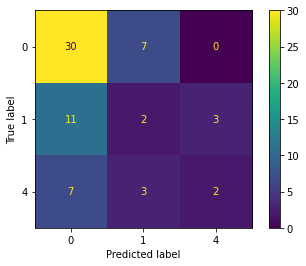

In [62]:
plot_confusion_matrix(svclassifier, X_test_scaled, y_test, values_format = 'd', display_labels = ['0', '1', '4'])

## Gaussian Kernel


In [63]:
svclassifier = SVC(kernel='rbf', random_state = 0, C = 0.5, gamma = 0.1)
svclassifier.fit(X_train_scaled, y_train)
y_pred = svclassifier.predict(X_test_scaled)

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76        37
           1       0.00      0.00      0.00        16
           4       0.00      0.00      0.00        12

    accuracy                           0.57        65
   macro avg       0.20      0.33      0.25        65
weighted avg       0.35      0.57      0.43        65



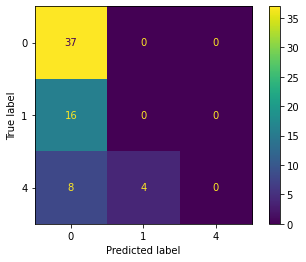

In [64]:
plot_confusion_matrix(svclassifier, X_test_scaled, y_test, values_format = 'd', display_labels = ['0', '1', '4'])

## Sigmoid Kernel

In [65]:
svclassifier = SVC(kernel='sigmoid', random_state = 0, C = 0.5, gamma = 0.1)
svclassifier.fit(X_train_scaled, y_train)
y_pred = svclassifier.predict(X_test_scaled)
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.74      0.95      0.83        37
           1       0.22      0.25      0.24        16
           4       0.00      0.00      0.00        12

    accuracy                           0.60        65
   macro avg       0.32      0.40      0.36        65
weighted avg       0.48      0.60      0.53        65



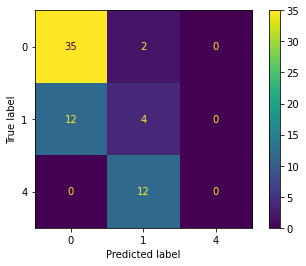

In [66]:
plot_confusion_matrix(svclassifier, X_test_scaled, y_test, values_format = 'd', display_labels = ['0', '1', '4'])